In [6]:
%load_ext sql

In [7]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install -q pandas==1.1.5

In [8]:
%sql sqlite:///socioeconomic.db

'Connected: @socioeconomic.db'

In [9]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

In [10]:
%sql SELECT * FROM chicago_socioeconomic_data limit 20;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


In [11]:
#problem1: How many rows are in the dataset?

%sql SELECT count(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


count(*)
78


In [12]:
#problem2: How many community areas in Chicago have a hardship index greater than 50.0?

%sql SELECT count(community_area_name) from chicago_socioeconomic_data where hardship_index > 50.0;

 * sqlite:///socioeconomic.db
Done.


count(community_area_name)
38


In [13]:
#problem3: What is the maximum value of hardship index in this dataset?

%sql SELECT MAX(hardship_index) as max_hardship_index from chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


max_hardship_index
98.0


In [14]:
#problem4: Which community area has the highest hardship index?

%sql SELECT MAX(hardship_index) as max_hardship_index, community_area_name from chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


max_hardship_index,community_area_name
98.0,Riverdale


In [15]:
#problem5: Which Chicago community areas have per-capita incomes greater than $30,000?

df2 = %sql SELECT * from chicago_socioeconomic_data WHERE per_capita_income_ > 30000;
df2

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0
12.0,Forest Glen,1.1,7.5,6.8,4.9,40.5,44164,11.0
22.0,Logan Square,3.2,16.8,8.2,14.8,26.2,31908,23.0


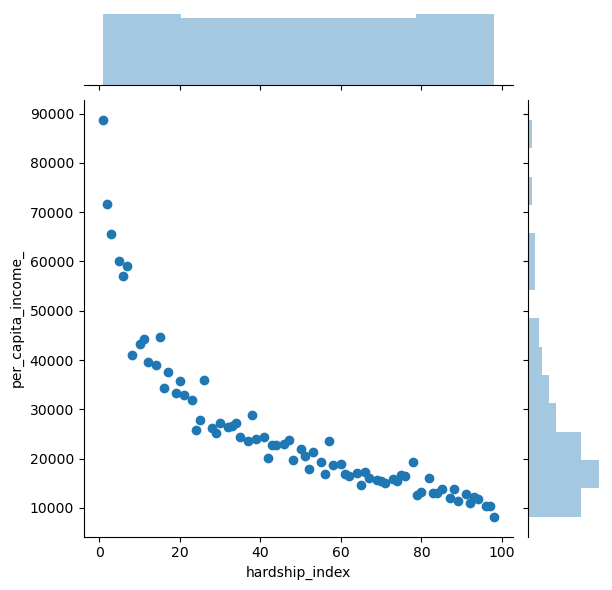

In [16]:
#problem 6: A scatter plot using the variables per_capita_income_ and hardship_index showing the correlation between the two variables

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plot = sns.jointplot(x='hardship_index', y='per_capita_income_', data=df)
plt.show()

<AxesSubplot:xlabel='per_capita_income_'>

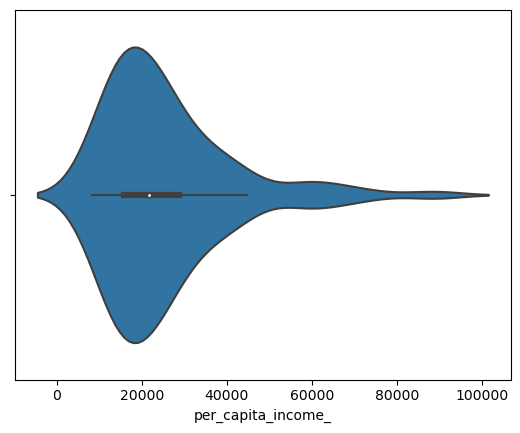

In [17]:
sns.violinplot(x=df["per_capita_income_"])

<AxesSubplot:xlabel='hardship_index'>

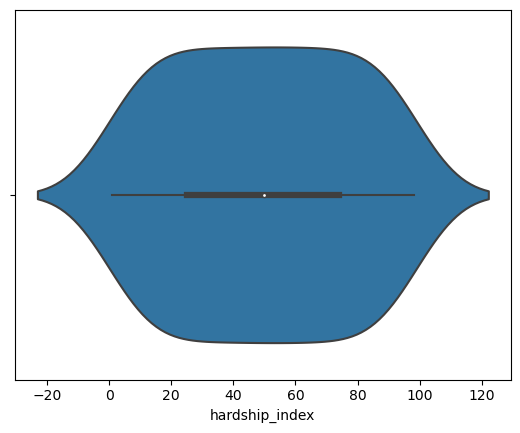

In [18]:
sns.violinplot(x=df["hardship_index"])

In [38]:
%sql SELECT ca, community_area_name, percent_of_housing_crowded, percent_households_below_poverty, CASE WHEN percent_households_below_poverty BETWEEN 0 AND 20 THEN '0-20' WHEN percent_households_below_poverty BETWEEN 20 AND 40 THEN '20-40' WHEN percent_households_below_poverty BETWEEN 40 AND 60 THEN '40-60' WHEN percent_households_below_poverty BETWEEN 60 AND 80 THEN '60-80' ELSE 'above 80' END AS percent_below_poverty_category, percent_aged_16_unemployed, percent_aged_25_without_high_school_diploma, percent_aged_under_18_or_over_64, per_capita_income_, hardship_index from chicago_socioeconomic_data;







 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_below_poverty_category,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,20-40,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,0-20,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,20-40,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,0-20,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,0-20,5.2,4.5,26.2,57123,6.0
6.0,Lake View,1.1,11.4,0-20,4.7,2.6,17.0,60058,5.0
7.0,Lincoln Park,0.8,12.3,0-20,5.1,3.6,21.5,71551,2.0
8.0,Near North Side,1.9,12.9,0-20,7.0,2.5,22.6,88669,1.0
9.0,Edison Park,1.1,3.3,0-20,6.5,7.4,35.3,40959,8.0
10.0,Norwood Park,2.0,5.4,0-20,9.0,11.5,39.5,32875,21.0
